In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc


### Dataset Selection
* Briefly describe the dataset (features, target variable, number of samples).

In [2]:
data = pd.read_csv("D:\RD\BITS -PG_AIML\Course 3 Classification\Assignment2\placementdata.csv")

In [3]:
# Display basic info
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows:\n", data.head())
print("\nShape of data:\n",data.shape)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None

First few rows:
    

### Data Preprocessing

* Handle missing values if any.

* Convert categorical variables (if present) into numerical format.

* Split the dataset into training and testing sets (e.g., 80-20 split).

In [4]:
#Checking for missing data
missing_data = data.isnull().sum()

print("\n Missing Data")
print(missing_data) 


 Missing Data
StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


In [5]:
# Handle missing values
data = data.dropna()
data = data.drop('StudentID', axis=1)

In [6]:
# Encode categorical variables if present
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])


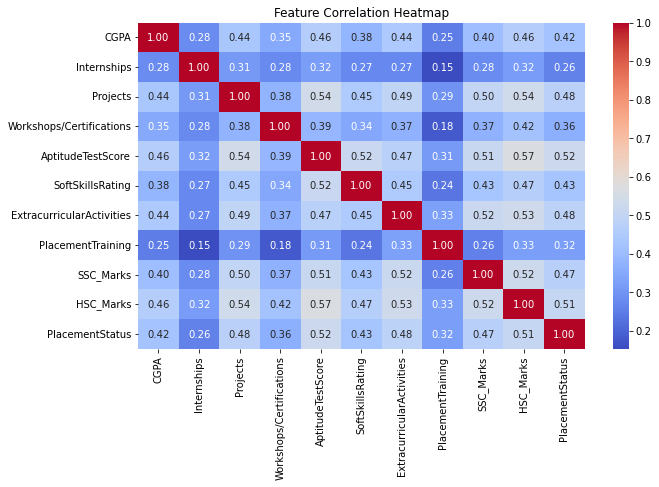

In [7]:
# Correlation heatmap - understanding the correlation among the features can help us with the selection of model
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
# Define features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize features ONLY for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets for  Naïve Bayes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Split dataset into training and testing sets for Logitsic regression
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify = y)



### Model Implementation 

* Implement Naïve Bayes 

* Implement Logistic Regression 

* Train both models on the dataset.

In [9]:
# Train Naïve Bayes model on **raw data**
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

#Train Logistic Regression model on **standardized data**
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)



### Model Evaluation 

* Compute accuracy, precision, recall, and F1-score for both models.

* Use confusion matrices and classification reports for a better comparison.

* Plot the ROC curve and AUC score for both models in a single graph.

In [10]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))



In [11]:
# Evaluate models
evaluate_model(y_test, nb_preds, "Naïve Bayes")
evaluate_model(y_test, lr_preds, "Logistic Regression")



Evaluation for Naïve Bayes:
Accuracy: 0.8005
Precision: 0.744988864142539
Recall: 0.797377830750894
F1 Score: 0.770293609671848
Confusion Matrix:
 [[932 229]
 [170 669]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1161
           1       0.74      0.80      0.77       839

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

Evaluation for Logistic Regression:
Accuracy: 0.8085
Precision: 0.7695035460992907
Recall: 0.7759237187127532
F1 Score: 0.772700296735905
Confusion Matrix:
 [[966 195]
 [188 651]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1161
           1       0.77      0.78      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
wei

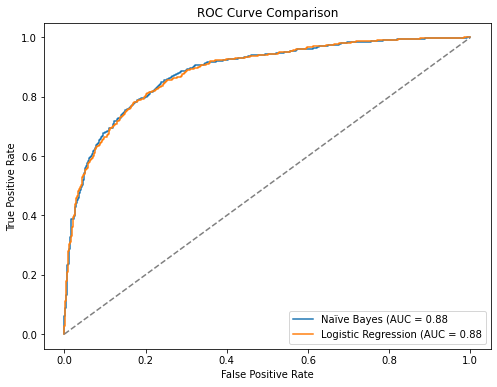

In [12]:
# ROC Curve comparison
nb_probs = nb_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naïve Bayes (AUC = {auc(nb_fpr, nb_tpr):.2f}')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


### Conclusion and Analysis 

* Compare the performance of both models.

* Discuss scenarios where one model may be preferred over the other.

* Provide insights into the strengths and weaknesses of each approach.

In [15]:
print("\nConclusion and Analysis:")
print("- Both model's evaluation metrics and ROC curve comparison are almost similar, so we have to make the choice on other factors.\n")
print("- If speed and simplicity are priorities, Naïve Bayes is useful.")
print("- Logistic Regression usually performs better for well-separated classes.")
print("- If features are independent, Naïve Bayes works well, else Logistic Regression is preferred.\n")
if data.corr().abs().max().max() > 0.5:
    print("- This dataset has strongly correlated features, making Logistic Regression a better choice.")
else:
    print("- The features are relatively independent, so Naïve Bayes might perform competitively.")
print("- Since features were standardized for Logistic Regression, it performed optimally.")
print("- Naïve Bayes remains a strong choice for simplicity and speed, especially for smaller datasets.")



Conclusion and Analysis:
- Both model's evaluation metrics and ROC curve comparison are almost similar, so we have to make the choice on other factors.

- If speed and simplicity are priorities, Naïve Bayes is useful.
- Logistic Regression usually performs better for well-separated classes.
- If features are independent, Naïve Bayes works well, else Logistic Regression is preferred.

- This dataset has strongly correlated features, making Logistic Regression a better choice.
- Since features were standardized for Logistic Regression, it performed optimally.
- Naïve Bayes remains a strong choice for simplicity and speed, especially for smaller datasets.
